In [37]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('hotel_bookings.csv')
df.head(5)

hotel 
 is_canceled 
 lead_time 
 arrival_date_year 
 arrival_date_month 
 arrival_date_week_number 
 arrival_date_day_of_month 
 stays_in_weekend_nights 
 stays_in_week_nights 
 adults 
 ... 
 deposit_type 
 agent 
 company 
 days_in_waiting_list 
 customer_type 
 adr 
 required_car_parking_spaces 
 total_of_special_requests 
 reservation_status 
 reservation_status_date 
 
 
 
 
 0 
 Resort Hotel 
 0 
 342 
 2015 
 July 
 27 
 1 
 0 
 0 
 2 
 ... 
 No Deposit 
 NaN 
 NaN 
 0 
 Transient 
 0.0 
 0 
 0 
 Check-Out 
 2015-07-01 
 
 
 1 
 Resort Hotel 
 0 
 737 
 2015 
 July 
 27 
 1 
 0 
 0 
 2 
 ... 
 No Deposit 
 NaN 
 NaN 
 0 
 Transient 
 0.0 
 0 
 0 
 Check-Out 
 2015-07-01 
 
 
 2 
 Resort Hotel 
 0 
 7 
 2015 
 July 
 27 
 1 
 0 
 1 
 1 
 ... 
 No Deposit 
 NaN 
 NaN 
 0 
 Transient 
 75.0 
 0 
 0 
 Check-Out 
 2015-07-02 
 
 
 3 
 Resort Hotel 
 0 
 13 
 2015 
 July 
 27 
 1 
 0 
 1 
 1 
 ... 
 No Deposit 
 304.0 
 NaN 
 0 
 Transient 
 75.0 
 0 
 0 
 Check-Out 
 2015-07-02 
 
 
 4 
 Resort Hotel 
 0 
 14 
 2015 
 July 
 27 
 1 
 0 
 2 
 2 
 ... 
 No Deposit 
 240.0 
 NaN 
 0 
 Transient 
 98.0 
 0 
 1 
 Check-Out 
 2015-07-03 
 
 
 
 5 rows × 32 columns

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [40]:
df.isnull().sum().sort_values(ascending=False)

In [41]:
df.describe()

is_canceled 
 lead_time 
 arrival_date_year 
 arrival_date_week_number 
 arrival_date_day_of_month 
 stays_in_weekend_nights 
 stays_in_week_nights 
 adults 
 children 
 babies 
 is_repeated_guest 
 previous_cancellations 
 previous_bookings_not_canceled 
 booking_changes 
 agent 
 company 
 days_in_waiting_list 
 adr 
 required_car_parking_spaces 
 total_of_special_requests 
 
 
 
 
 count 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119386.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 103050.000000 
 6797.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 119390.000000 
 
 
 mean 
 0.370416 
 104.011416 
 2016.156554 
 27.165173 
 15.798241 
 0.927599 
 2.500302 
 1.856403 
 0.103890 
 0.007949 
 0.031912 
 0.087118 
 0.137097 
 0.221124 
 86.693382 
 189.266735 
 2.321149 
 101.831122 
 0.062518 
 0.571363 
 
 
 std 
 0.482918 
 106.863097 
 0.707476 
 13.605138 
 8.780829 
 0.998613 
 1.908286 
 0.579261 
 0.398561 
 0.097436 
 0.175767 
 0.844336 
 1.497437 
 0.652306 
 110.774548 
 131.655015 
 17.594721 
 50.535790 
 0.245291 
 0.792798 
 
 
 min 
 0.000000 
 0.000000 
 2015.000000 
 1.000000 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 6.000000 
 0.000000 
 -6.380000 
 0.000000 
 0.000000 
 
 
 25% 
 0.000000 
 18.000000 
 2016.000000 
 16.000000 
 8.000000 
 0.000000 
 1.000000 
 2.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 9.000000 
 62.000000 
 0.000000 
 69.290000 
 0.000000 
 0.000000 
 
 
 50% 
 0.000000 
 69.000000 
 2016.000000 
 28.000000 
 16.000000 
 1.000000 
 2.000000 
 2.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 14.000000 
 179.000000 
 0.000000 
 94.575000 
 0.000000 
 0.000000 
 
 
 75% 
 1.000000 
 160.000000 
 2017.000000 
 38.000000 
 23.000000 
 2.000000 
 3.000000 
 2.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 229.000000 
 270.000000 
 0.000000 
 126.000000 
 0.000000 
 1.000000 
 
 
 max 
 1.000000 
 737.000000 
 2017.000000 
 53.000000 
 31.000000 
 19.000000 
 50.000000 
 55.000000 
 10.000000 
 10.000000 
 1.000000 
 26.000000 
 72.000000 
 21.000000 
 535.000000 
 543.000000 
 391.000000 
 5400.000000 
 8.000000 
 5.000000

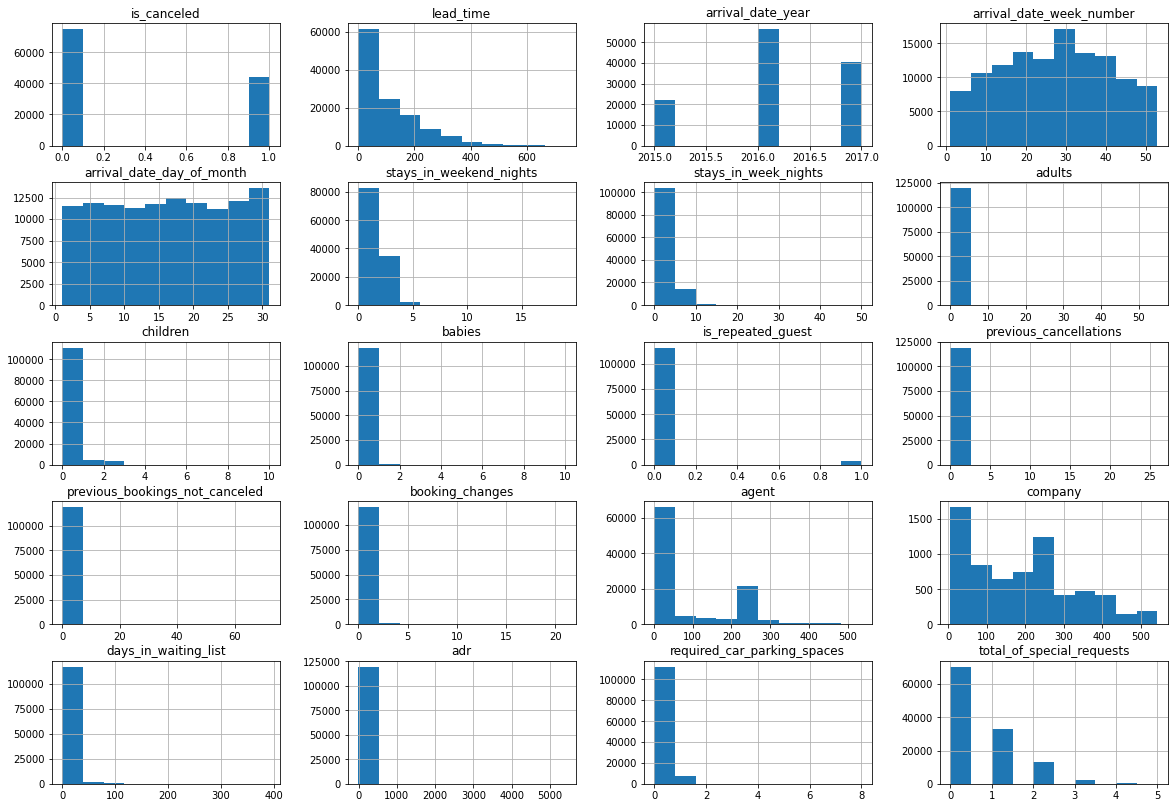

In [42]:
df.hist(figsize=(20,14))
plt.show()

In [43]:
nan_replacements = {"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)
df["meal"].replace("Undefined", "SC", inplace=True)
nan_value = float("NaN")
df.replace(nan_value, 0.0,  inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
zero_guests = list(df.loc[df["adults"]
                   + df["children"]
                   + df["babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)
df.drop_duplicates(inplace=True)

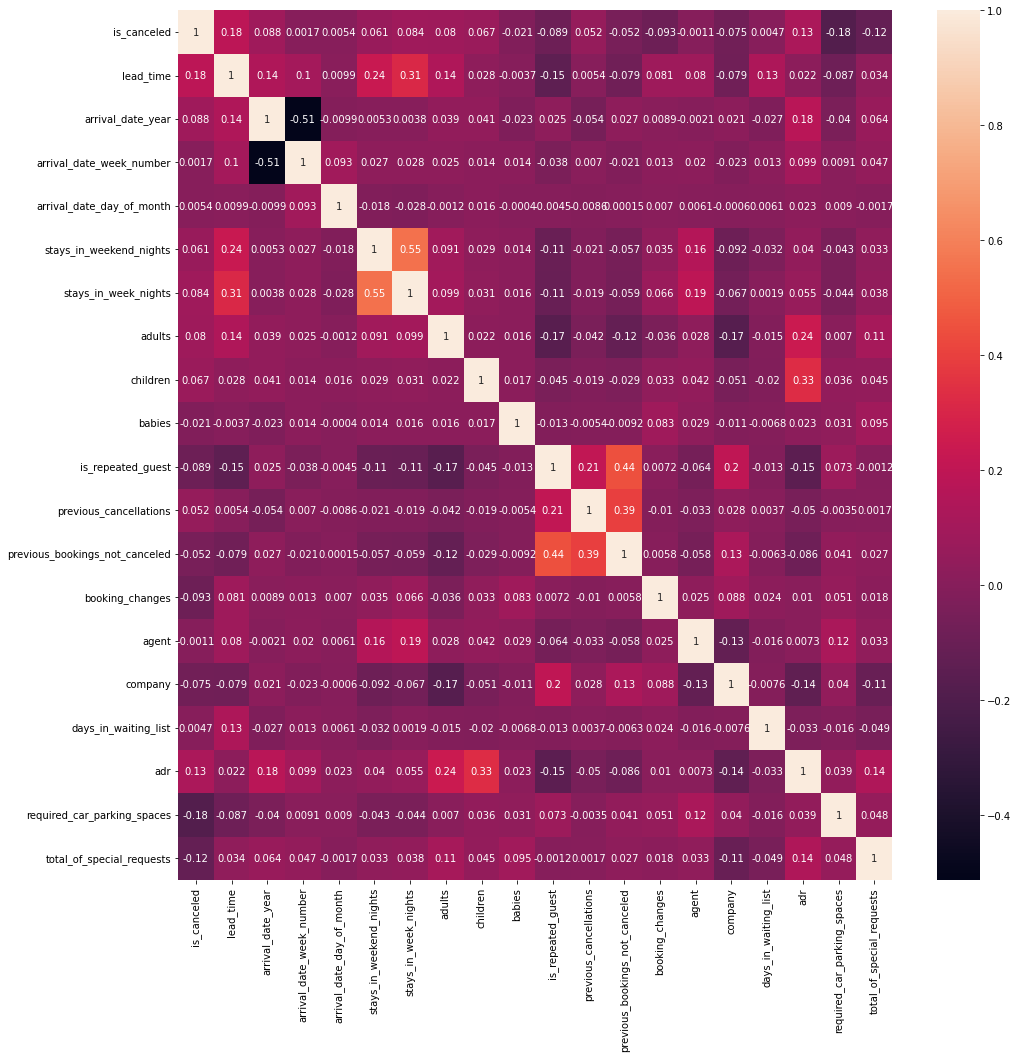

In [44]:
plt.figure(figsize = (16,16))
ax=sns.heatmap(df.corr(), annot=True)
plt.show()

In [45]:
target_correlation = df.corr()['is_canceled'].sort_values(ascending = False) #.abs()
target_correlation

In [46]:
df = df.drop(['reservation_status_date'],axis=1)

In [47]:
num_features = ['lead_time','arrival_date_year','arrival_date_week_number','stays_in_weekend_nights',
               'stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations',
                'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces',
                'total_of_special_requests']
cat_features = ['hotel', 'arrival_date_month','meal','country','market_segment',
                'distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent',
                'company','customer_type','reservation_status']
features = num_features + cat_features

In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_data = df[cat_features]
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data

hotel 
 arrival_date_month 
 meal 
 country 
 market_segment 
 distribution_channel 
 reserved_room_type 
 assigned_room_type 
 deposit_type 
 agent 
 company 
 customer_type 
 reservation_status 
 
 
 
 
 0 
 1 
 5 
 0 
 135 
 3 
 1 
 2 
 2 
 0 
 0 
 0 
 2 
 1 
 
 
 1 
 1 
 5 
 0 
 135 
 3 
 1 
 2 
 2 
 0 
 0 
 0 
 2 
 1 
 
 
 2 
 1 
 5 
 0 
 59 
 3 
 1 
 0 
 2 
 0 
 0 
 0 
 2 
 1 
 
 
 3 
 1 
 5 
 0 
 59 
 2 
 0 
 0 
 0 
 0 
 221 
 0 
 2 
 1 
 
 
 4 
 1 
 5 
 0 
 59 
 6 
 3 
 0 
 0 
 0 
 174 
 0 
 2 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 119385 
 0 
 1 
 0 
 15 
 5 
 3 
 0 
 0 
 0 
 272 
 0 
 2 
 1 
 
 
 119386 
 0 
 1 
 0 
 56 
 6 
 3 
 4 
 4 
 0 
 9 
 0 
 2 
 1 
 
 
 119387 
 0 
 1 
 0 
 43 
 6 
 3 
 3 
 3 
 0 
 9 
 0 
 2 
 1 
 
 
 119388 
 0 
 1 
 0 
 59 
 6 
 3 
 0 
 0 
 0 
 78 
 0 
 2 
 1 
 
 
 119389 
 0 
 1 
 2 
 43 
 6 
 3 
 0 
 0 
 0 
 9 
 0 
 2 
 1 
 
 
 
 87230 rows × 13 columns

In [49]:
num_data = df[num_features]
num_data['children'] = num_data['children'].astype('int')

In [50]:
X = pd.concat([cat_data, num_data], axis = 1)
y = df['is_canceled']
print(X.shape,y.shape)

(87230, 29) (87230,)


In [51]:
X.head()

hotel 
 arrival_date_month 
 meal 
 country 
 market_segment 
 distribution_channel 
 reserved_room_type 
 assigned_room_type 
 deposit_type 
 agent 
 ... 
 children 
 babies 
 is_repeated_guest 
 previous_cancellations 
 previous_bookings_not_canceled 
 booking_changes 
 days_in_waiting_list 
 adr 
 required_car_parking_spaces 
 total_of_special_requests 
 
 
 
 
 0 
 1 
 5 
 0 
 135 
 3 
 1 
 2 
 2 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 3 
 0 
 0.0 
 0 
 0 
 
 
 1 
 1 
 5 
 0 
 135 
 3 
 1 
 2 
 2 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 4 
 0 
 0.0 
 0 
 0 
 
 
 2 
 1 
 5 
 0 
 59 
 3 
 1 
 0 
 2 
 0 
 0 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 75.0 
 0 
 0 
 
 
 3 
 1 
 5 
 0 
 59 
 2 
 0 
 0 
 0 
 0 
 221 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 75.0 
 0 
 0 
 
 
 4 
 1 
 5 
 0 
 59 
 6 
 3 
 0 
 0 
 0 
 174 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 98.0 
 0 
 1 
 
 
 
 5 rows × 29 columns

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [53]:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

In [54]:
rf_model_enh.fit(X_train, y_train)
y_hat = rf_model_enh.predict(X_test)

In [55]:
rf_model_enh.score(X_test, y_test)

1.0

In [56]:
print(y_hat[y_hat != y_test].size)

0


Wow, what an amazing model! :)

### HW 2 Tasks
TO-DO:
- For the selected observation from the dataset, calculate the model prediction.
- For the selected observation from point 1, calculate the model prediction decomposition using LIME (packages in R: live, lime, localModel, iml).
- Compare LIME decomposition for different observations in the set. How stable are the received explanations?
- Comment on the individual results obtained in the above paragraphs.

### Step 1: Prediction calculation
I've chosen the observation below for the prediction and explanation:

In [57]:
i1 = 5252
X_test.iloc[[i1]]

hotel 
 arrival_date_month 
 meal 
 country 
 market_segment 
 distribution_channel 
 reserved_room_type 
 assigned_room_type 
 deposit_type 
 agent 
 ... 
 children 
 babies 
 is_repeated_guest 
 previous_cancellations 
 previous_bookings_not_canceled 
 booking_changes 
 days_in_waiting_list 
 adr 
 required_car_parking_spaces 
 total_of_special_requests 
 
 
 
 
 31872 
 1 
 4 
 0 
 25 
 6 
 3 
 3 
 3 
 0 
 311 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 37.44 
 0 
 1 
 
 
 
 1 rows × 29 columns

In [58]:
print("Prediction:", rf_model_enh.predict(X_test.iloc[[i1]]))
print('True value:', y_test.iloc[i1])

Prediction: [0]
True value: 0


As expected, the prediction was correct.

### Step 2: model prediction decomposition calculation

Let us create an explainer object: we are dealing with a classification task, hence the mode. The class names I chose are `Not Canceled` for 0 and `Canceled` for 1.

In [59]:
from lime.lime_tabular import LimeTabularExplainer 

explainer = LimeTabularExplainer(X_train.values, 
                                mode='classification',
                                feature_names=X_train.columns,  
                                class_names=['Not Canceled', 'Is Canceled'],
                                verbose=True, 
                                random_state=21)

Now it's time to make the first explanation. However, we need to modify the prediction function first, as the default one is not compatible with the lime explainer. I've limited the number of features to 15 after a couple of executions with different parameters and examining their results.

In [60]:
predict_fn_rf = lambda x: rf_model_enh.predict_proba(x).astype(float)
explanation = explainer.explain_instance(X_test.iloc[[i1]].values[0], predict_fn_rf, num_features=15)

explanation.show_in_notebook()

Intercept 0.9694310575406664
Prediction_local [0.00536495]
Right: 0.0


We observe that most variables have little or no impact on target. On the left, we see prediction probabilities, in the middle are weights the scales of influence for each variable in descending order. On the right, we see how each of the variables is in favour of either 1 (orange colour) or 0 (blue). The `reservation_status` variable has the strongest negative influence, `deposite_type` and `previous_cancellations` variables have a slight negative impact, a `required_car_parking_spaces` variable has some positive impact. 

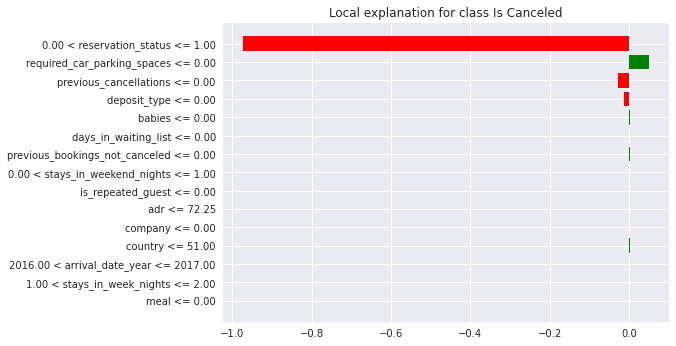

In [61]:

plt.rcParams["figure.figsize"] = (16,35)
with plt.style.context('seaborn'):
    explanation.as_pyplot_figure()

On the plot we see the same results, but it's easier to read.

### Step 3: LIME Decomposition comparison

I chose two additional observations to compare their explanations to the first one. 

In [62]:
i2 = 2525
X_test.iloc[[i2]]

hotel 
 arrival_date_month 
 meal 
 country 
 market_segment 
 distribution_channel 
 reserved_room_type 
 assigned_room_type 
 deposit_type 
 agent 
 ... 
 children 
 babies 
 is_repeated_guest 
 previous_cancellations 
 previous_bookings_not_canceled 
 booking_changes 
 days_in_waiting_list 
 adr 
 required_car_parking_spaces 
 total_of_special_requests 
 
 
 
 
 38383 
 1 
 5 
 0 
 154 
 6 
 3 
 6 
 6 
 0 
 176 
 ... 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 292.75 
 1 
 1 
 
 
 
 1 rows × 29 columns

In [63]:
print("Prediction:", rf_model_enh.predict(X_test.iloc[[i2]]))
print('True value:', y_test.iloc[i2])

Prediction: [0]
True value: 0


In [64]:
explanation2 = explainer.explain_instance(X_test.iloc[[i2]].values[0], predict_fn_rf, num_features=15)

explanation2.show_in_notebook()

Intercept 1.0233204503822904
Prediction_local [-0.03758862]
Right: 0.0


Here we can notice that `required_car_parking_spaces` has a negative impact, and the weights of `deposite_type` and `previous_cancellations` variables have changed. `days_in_waiting_list` also has some weight, while in the first example, it did not have.

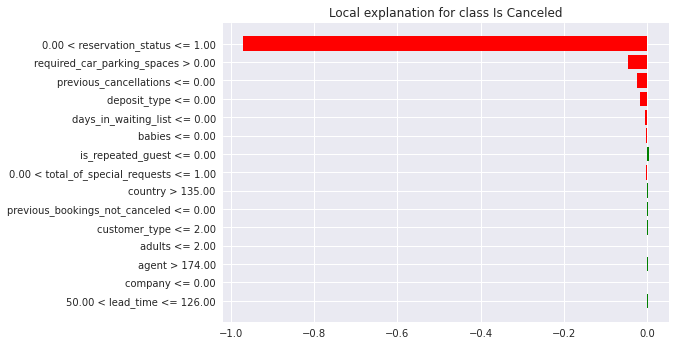

In [65]:
with plt.style.context('seaborn'):
    explanation2.as_pyplot_figure()

In [66]:
i3 = 5225
X_test.iloc[[i3]]

hotel 
 arrival_date_month 
 meal 
 country 
 market_segment 
 distribution_channel 
 reserved_room_type 
 assigned_room_type 
 deposit_type 
 agent 
 ... 
 children 
 babies 
 is_repeated_guest 
 previous_cancellations 
 previous_bookings_not_canceled 
 booking_changes 
 days_in_waiting_list 
 adr 
 required_car_parking_spaces 
 total_of_special_requests 
 
 
 
 
 71983 
 0 
 5 
 3 
 11 
 6 
 3 
 0 
 0 
 0 
 9 
 ... 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 89.1 
 0 
 0 
 
 
 
 1 rows × 29 columns

In [67]:
print("Prediction:", rf_model_enh.predict(X_test.iloc[[i3]]))
print('True value:', y_test.iloc[i3])

Prediction: [1]
True value: 1


In this case, we receive a prediction that booking is going to be canceled, so it might be interesting to take a look at the explanation of such prediction.

In [68]:
explanation3 = explainer.explain_instance(X_test.iloc[[i3]].values[0], predict_fn_rf, num_features=15)

explanation3.show_in_notebook()

Intercept -0.0037589793898292756
Prediction_local [0.97196899]
Right: 1.0


Again, nothing is even close to the impact that `reservation_status` has. There it has 0 value, so the impact is positive. We can also notice that `required_car_parking_spaces` have a positive impact. Interestingly, in this situation, the `babies` variable has more influence than the `deposite_type` and `previous_cancellations` variables. Moreover, there way many variables have some impact on the target (have non-zero values in lime decomposition).

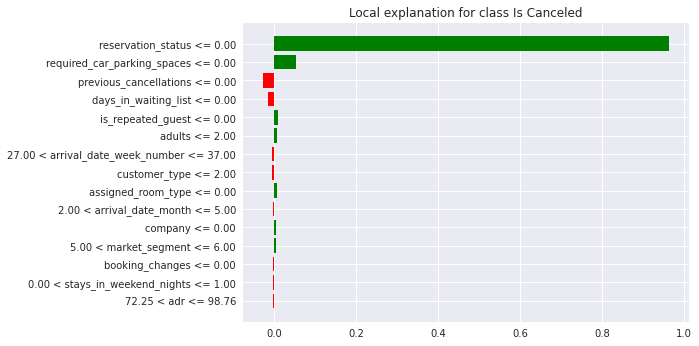

In [69]:
with plt.style.context('seaborn'):
    explanation3.as_pyplot_figure()

### Conclusions:
As it was expected, the `reservation_status` is the most important variable, which is easy to understand, even without using any complex models for prediction. The interesting fact in the results that we obtained is how the number of parking spaces affects the prediction, as for me this is definitely not something evident. I believe that previous cancellations and days spent on the waiting list are the factors that hotels would also take into attention when they receive a booking request.   

When it comes to the explanation stability, we see that some of the variables would have different impact on the prediction even with the same values (previous cancellations and days on the waiting list in case 1 and 2),however,I think this might be because of the change of required_car_paring_spaces variable's value. There are no significant changes in those weights simply because of the `reservation_status` importance.

I also want to say that I'm really surprised by how well the model predicted the observations this time; for me, the results are almost suspicious, so might take one more closer look at the process later.

The hw 2 was really interesting and I definitely learned a lot during the process, so thank you and have a great day :)